In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image
from auto_encoder2 import PAutoE

device = "cpu"

pimages = load_dataset().to(device)

In [13]:
T = 100
beta = torch.linspace(10e-4, 5, T)

alpha = 1 - beta

alpha_ = torch.zeros(T)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i])

alpha_

tensor([ 1.0000e+00,  9.9900e-01,  9.4756e-01,  8.5092e-01,  7.2116e-01,
         5.7478e-01,  4.2909e-01,  2.9866e-01,  1.9280e-01,  1.1472e-01,
         6.2471e-02,  3.0864e-02,  1.3690e-02,  5.3809e-03,  1.8433e-03,
         5.3838e-04,  1.3006e-04,  2.4852e-05,  3.4938e-06,  3.1476e-07,
         1.2463e-08, -1.3584e-10,  8.3395e-12, -9.3310e-13,  1.5152e-13,
        -3.2255e-14,  8.4952e-15, -2.6664e-15,  9.7154e-16, -4.0305e-16,
         1.8756e-16, -9.6753e-17,  5.4795e-17, -3.3800e-17,  2.2556e-17,
        -1.6191e-17,  1.2440e-17, -1.0186e-17,  8.8550e-18, -8.1449e-18,
         7.9030e-18, -8.0674e-18,  8.6425e-18, -9.6951e-18,  1.1365e-17,
        -1.3897e-17,  1.7695e-17, -2.3424e-17,  3.2191e-17, -4.5864e-17,
         6.7661e-17, -1.0323e-16,  1.6272e-16, -2.6471e-16,  4.4397e-16,
        -7.6707e-16,  1.3640e-15, -2.4944e-15,  4.6875e-15, -9.0455e-15,
         1.7912e-14, -3.6374e-14,  7.5700e-14, -1.6137e-13,  3.5214e-13,
        -7.8621e-13,  1.7951e-12, -4.1891e-12,  9.9

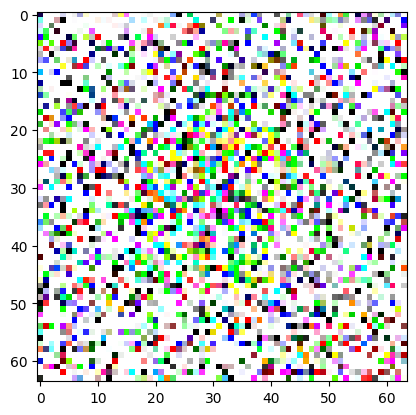

In [12]:
p = pimages[0][0] + torch.randn((4,64,64)) * torch.sqrt(torch.tensor(5))
plot_image(p)

In [15]:
1/0.02

50.0

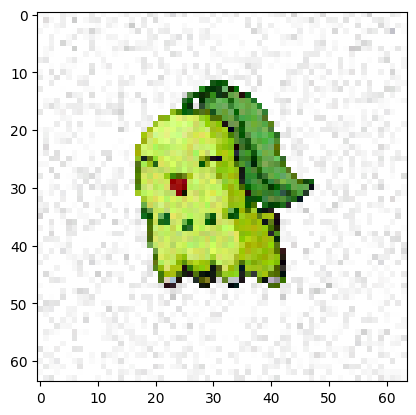

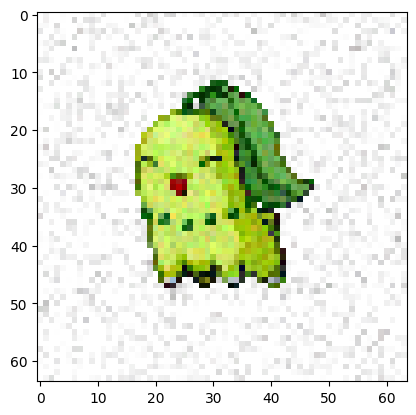

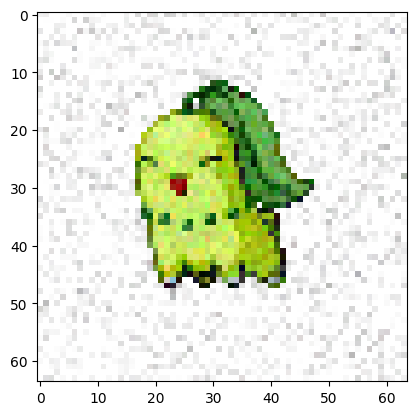

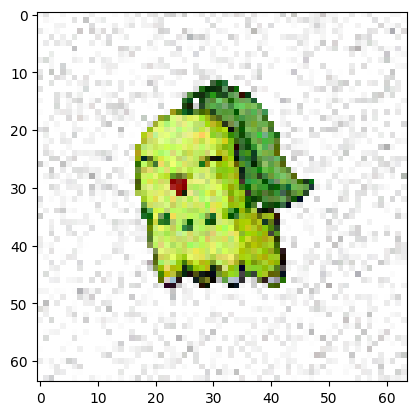

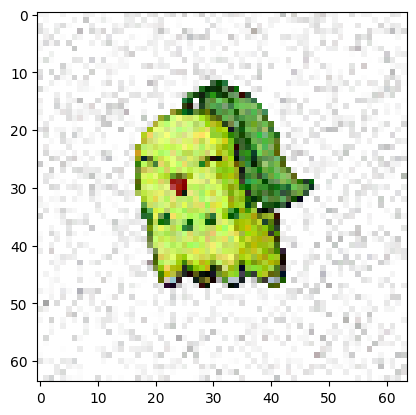

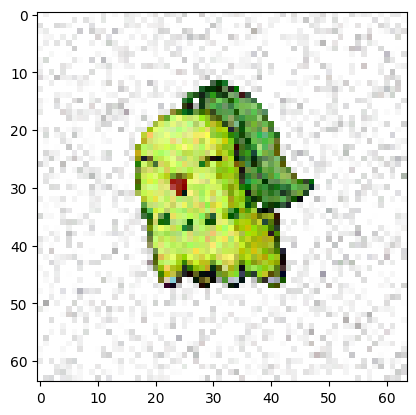

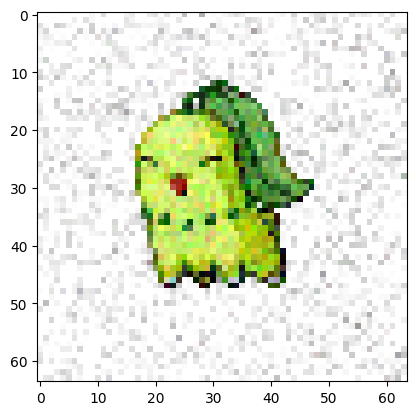

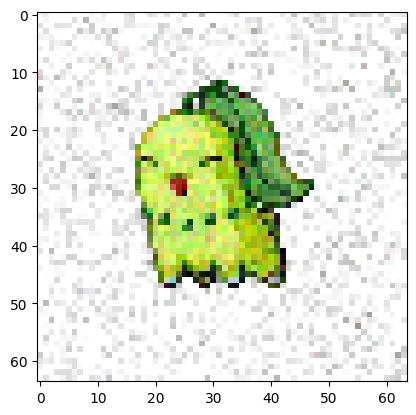

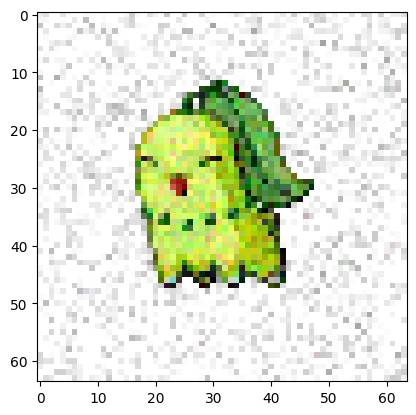

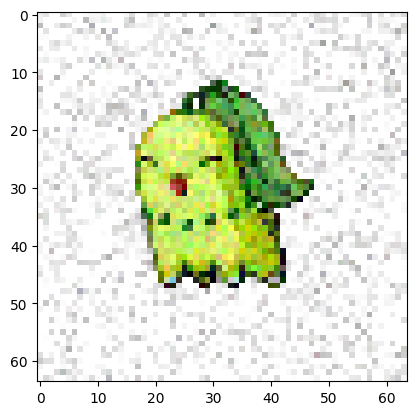

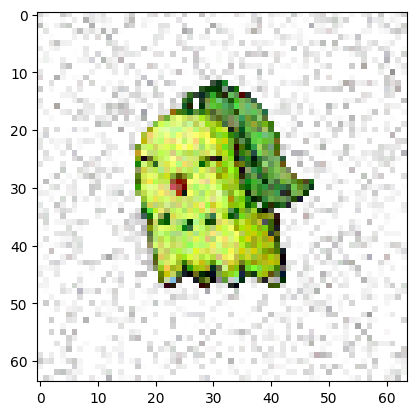

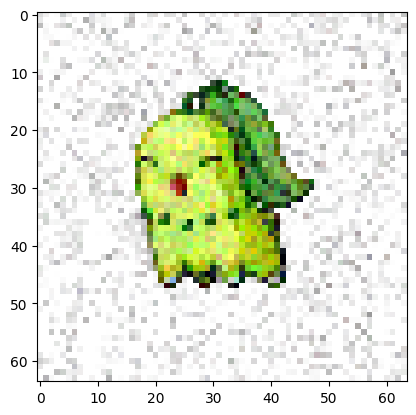

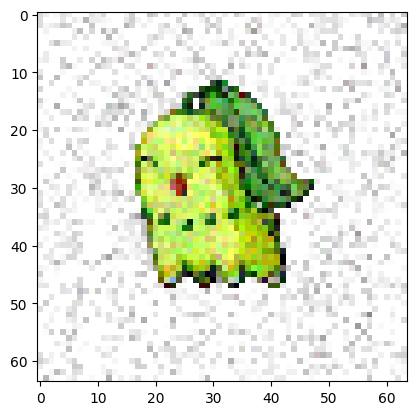

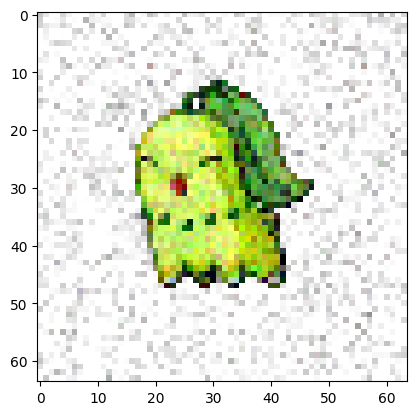

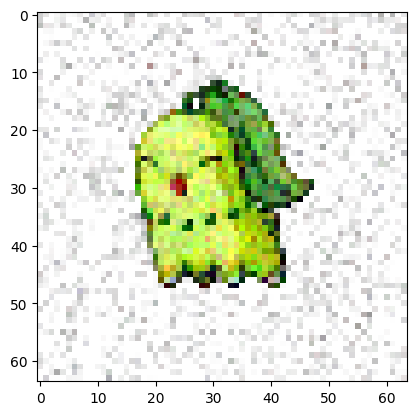

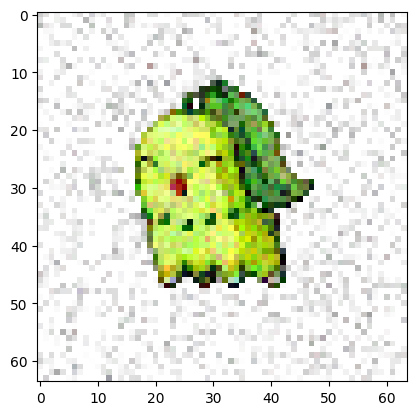

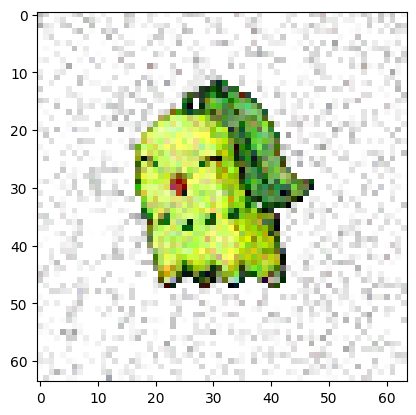

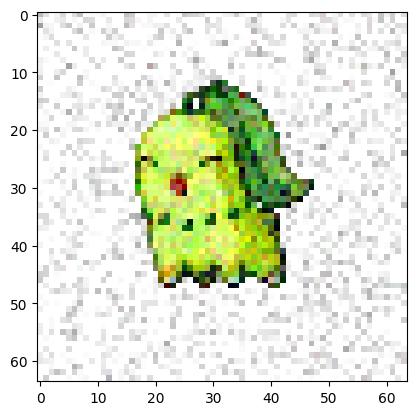

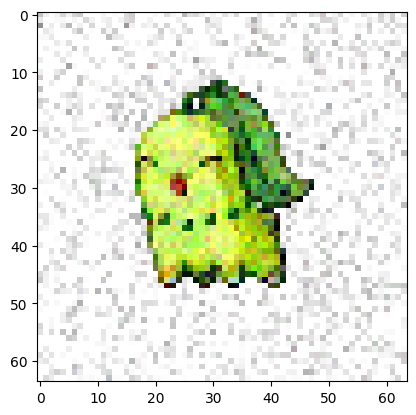

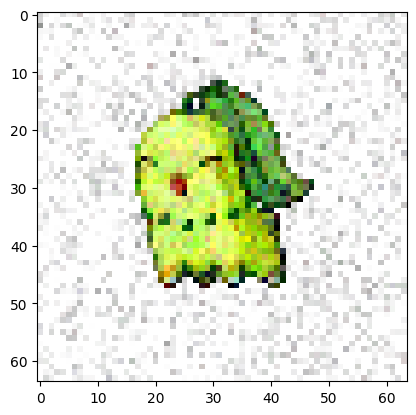

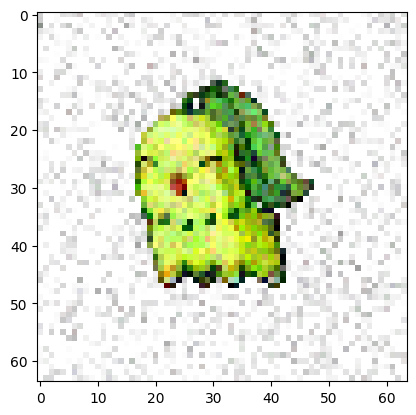

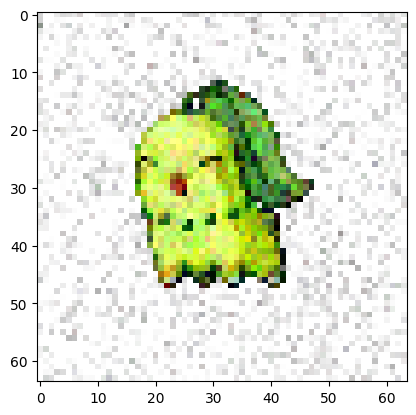

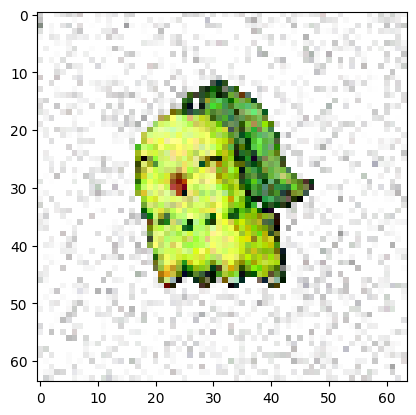

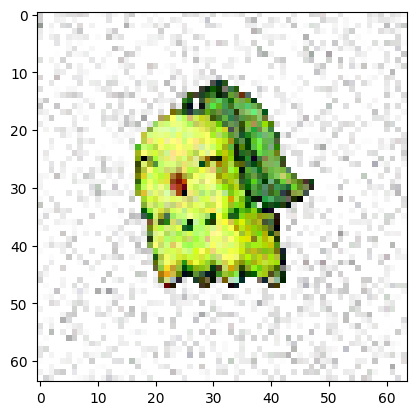

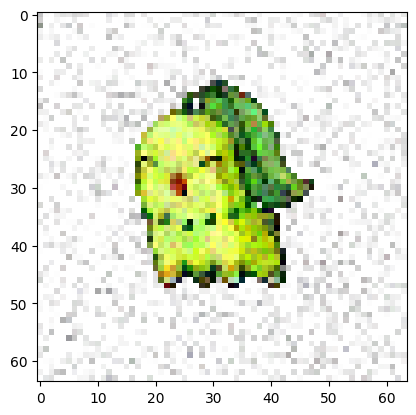

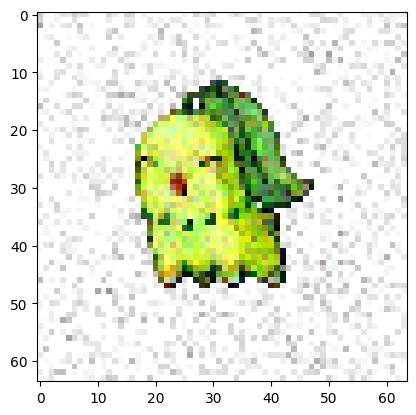

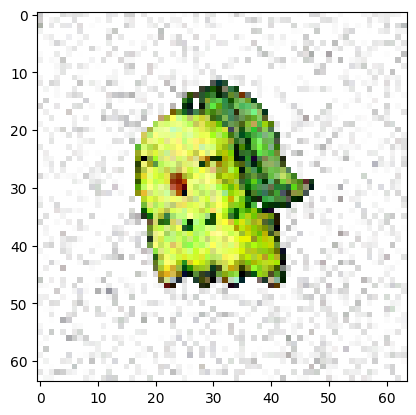

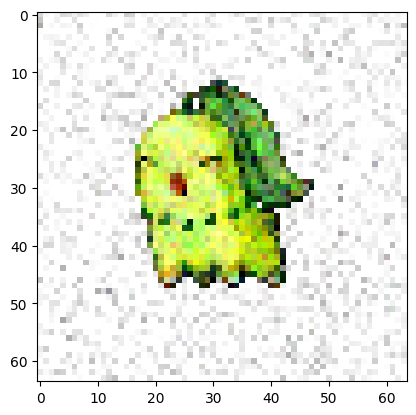

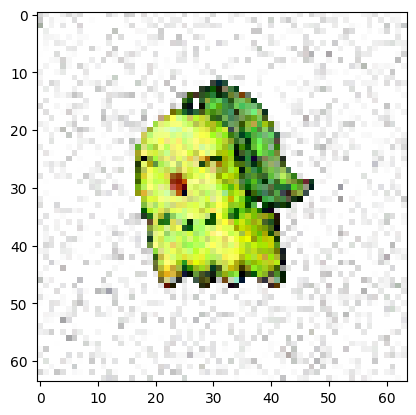

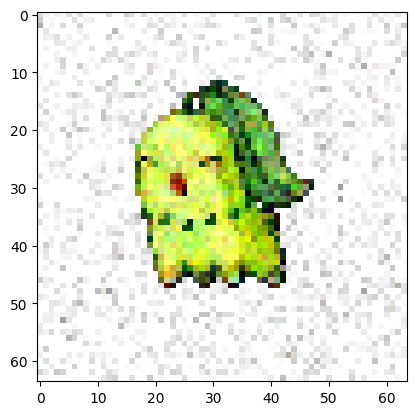

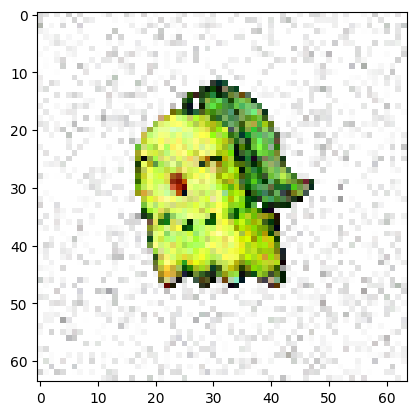

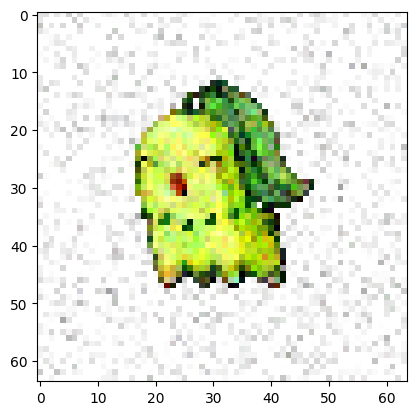

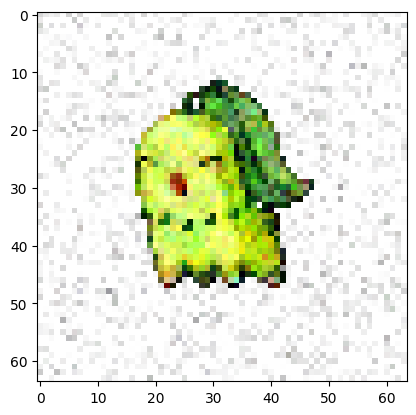

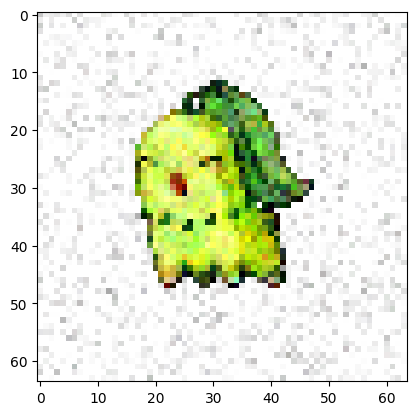

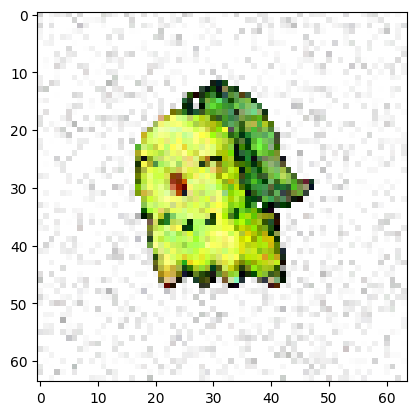

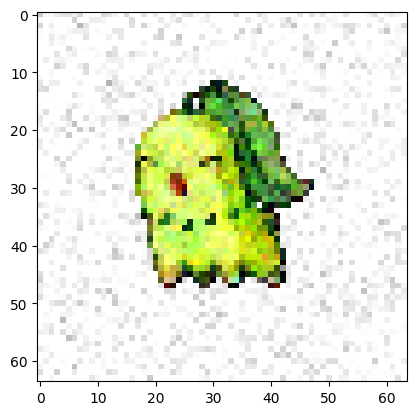

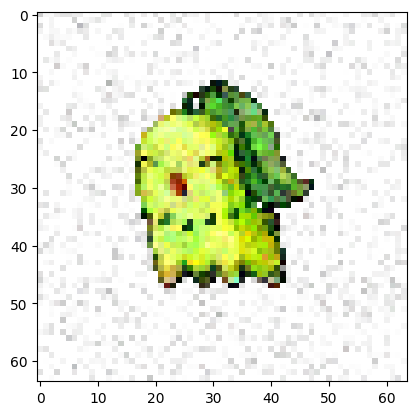

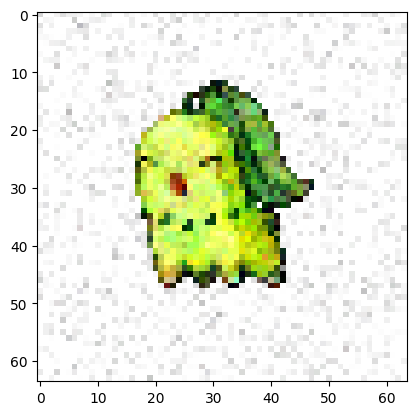

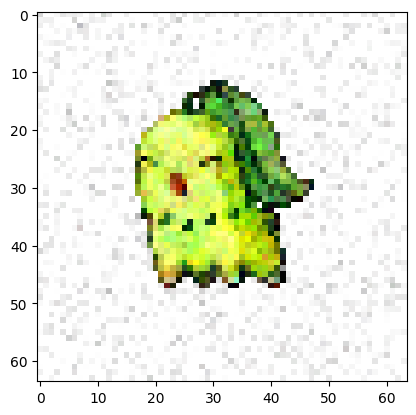

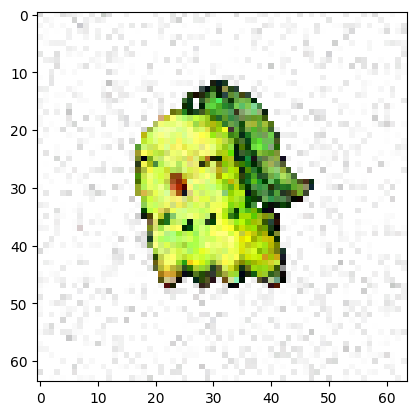

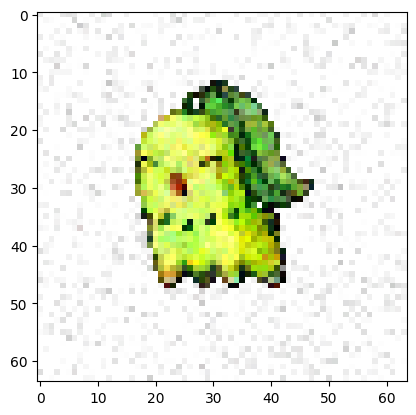

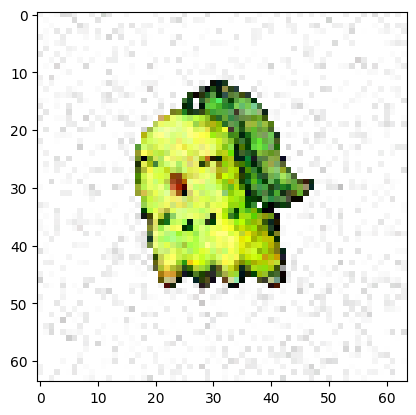

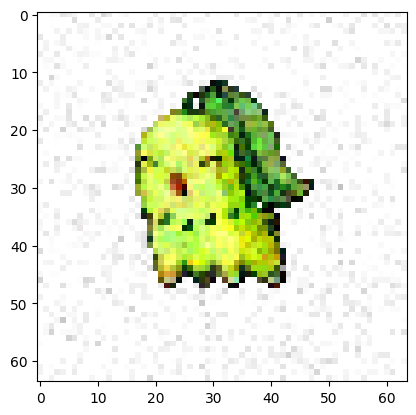

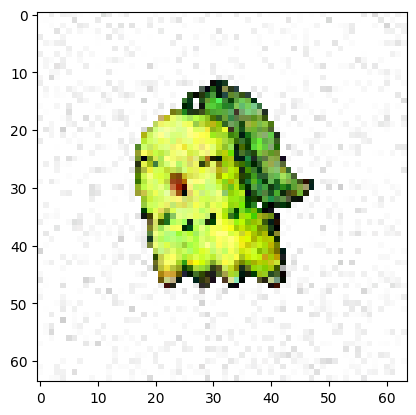

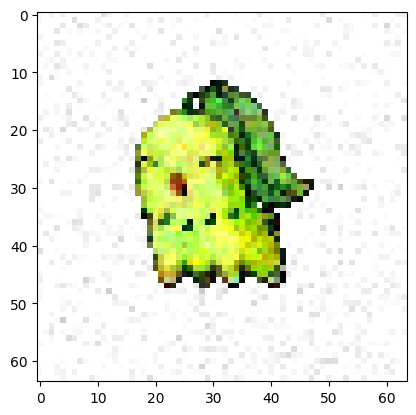

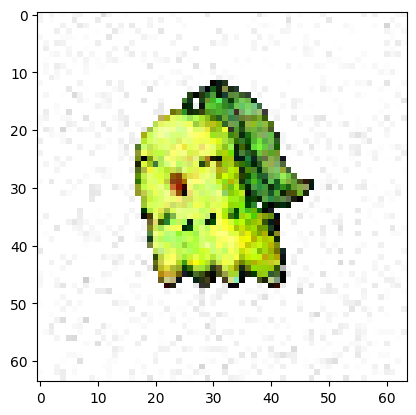

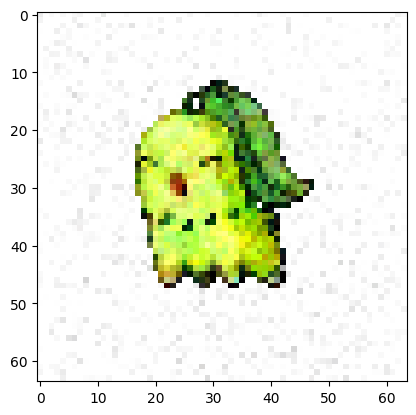

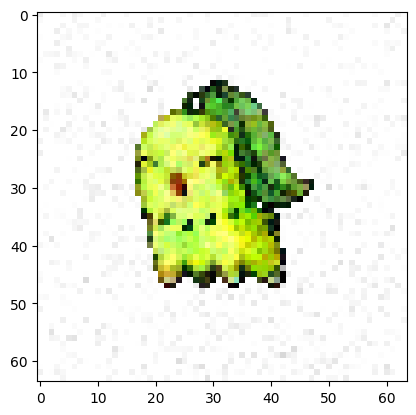

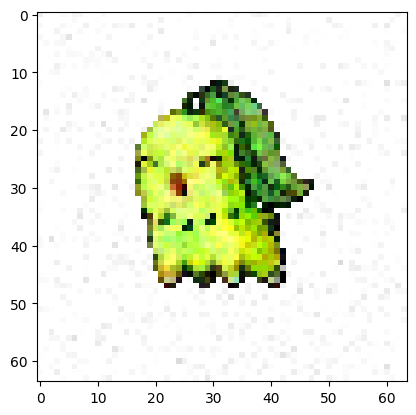

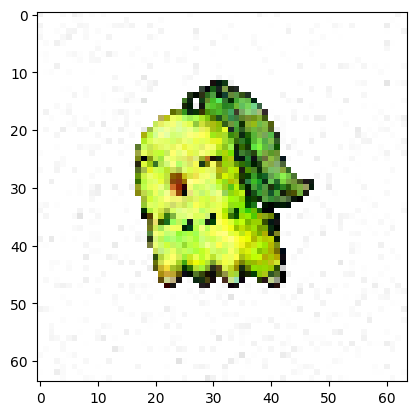

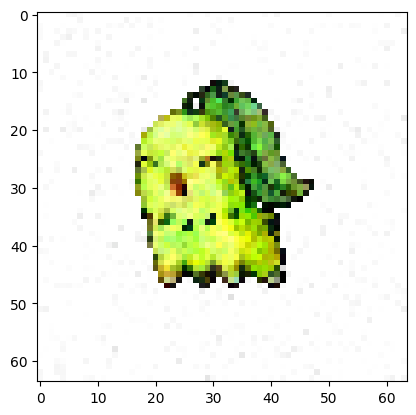

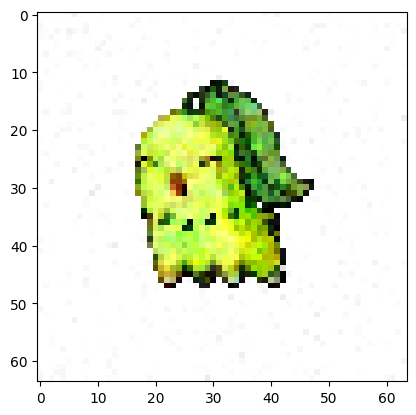

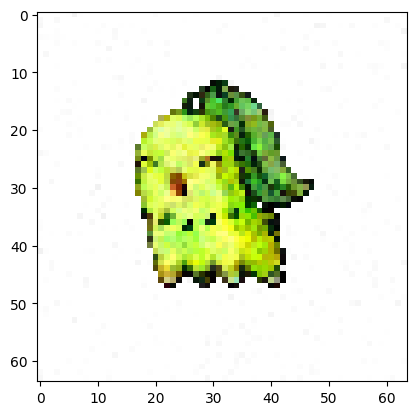

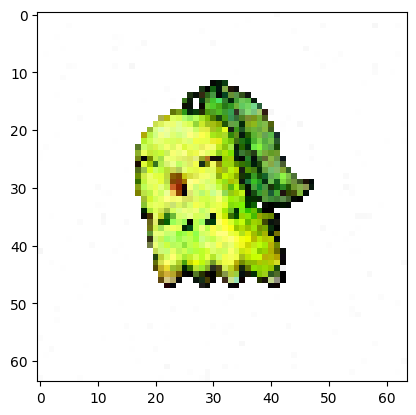

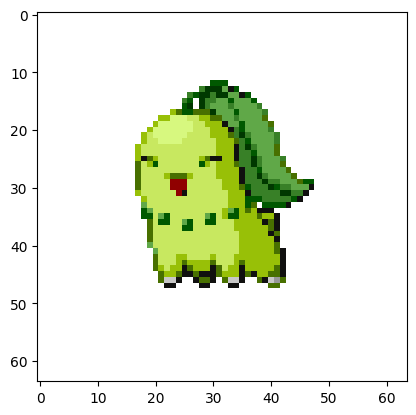

In [16]:
x = torch.randn((4,64,64)) * torch.sqrt(beta[55]) + pimages[0][251]

for t in reversed(range(55)):

    if (t == 0):
        break

    model = torch.jit.load(f"./model_{t}.pt").eval().to(device)
    
    z = torch.randn((4,64,64)) * torch.sqrt(beta[t])
    
    e = model(x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])
    x = (1 / torch.sqrt(alpha[t])) * (x - e) + z

    plot_image(x)

plot_image(pimages[0][251])    